<a href="https://colab.research.google.com/github/liminovna/DataViz_R_notebooks/blob/main/R_assgnt4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Работу выполнила
```
Ли-Мин Вадислава
```

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.4     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
library(tibble)
library(tidyr)

## Данные

Загрузите данные из файла в переменную mono, переведя строковые данные в факторы. В переменной mono_socio сохраните данные социолингвистической анкеты. В переменной mono оставьте только данные самого эксперимента. Переименуйте заголовки в последней таблице в следующие: “ParticipantID”, “QuestionType”, “NQuestions”, “Likert”, “RT”.

In [ ]:
# читаем данные в переменную mono
mono = read_csv2('https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/greek-word-order-mono-acceptability-coded-rt.txt')
dplyr::sample_n(mono, 10)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 7560 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (5): ParticipantID, TypeOfQuestion, TypeOfStimuli, WordOrder, ResponseAc...
dbl (1): RT

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ParticipantID,TypeOfQuestion,TypeOfStimuli,WordOrder,ResponseAcceptabilityJudgement,RT
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
09b1c9e98227331746533f60cc9b2c2d,AcceptabilityJudgement,FillerUnacceptable,NA,Wrong,2005
62382998fef70b0e45f24054bdb9c1d3,AcceptabilityJudgement,SubjectiveComment-Material,Incongruent,Correct,3516
bf37492932bd097cf6f24f42c3bdc3f4,AcceptabilityJudgement,FillerUnacceptable,Incongruent,Wrong,2123
4a547eb1ce4621cbe6992375bb69c431,AcceptabilityJudgement,FillerAcceptable,Incongruent,Correct,1706
0e1d152c354265b6c4ee9f94e4d34502,AcceptabilityJudgement,FillerUnacceptable,NA,Wrong,1812
021a49cde484f8fa18439f026ec99459,AcceptabilityJudgement,Size-Nationality,Incongruent,Correct,1719
4a547eb1ce4621cbe6992375bb69c431,AcceptabilityJudgement,FillerUnacceptable,Congruent,Wrong,1891
4c36a305cd282b3a0345e1040c817b58,AcceptabilityJudgement,FillerUnacceptable,Congruent,Wrong,2538
6d4175156dbd671735742b3fc10bd336,AcceptabilityJudgement,FillerUnacceptable,Congruent,Correct,1452


In [ ]:
# преобразовываем строковые данные в факторы
mono <- mono %>%
  mutate(across(where(is.character), as.factor))
dplyr::sample_n(mono, 10)

ParticipantID,TypeOfQuestion,TypeOfStimuli,WordOrder,ResponseAcceptabilityJudgement,RT
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
d5f41e13829f23761fc1836343283ce8,AcceptabilityJudgement,FillerAcceptable,Incongruent,Correct,2939
acea9e154b49d6848ca69104fab50468,AcceptabilityJudgement,FillerUnacceptable,Incongruent,Wrong,1772
7d032f844f1c45ceed867ace66e7cc97,AcceptabilityJudgement,FillerUnacceptable,Congruent,Wrong,1467
13c2695b718d431669e2dd09e03082eb,AcceptabilityJudgement,FillerUnacceptable,NA,Wrong,2335
2b32edc168af0561adaba5ad874fe72f,AcceptabilityJudgement,Size-Nationality,Incongruent,Correct,1474
ce251e843b9616ee6d11d1574a961e4c,AcceptabilityJudgement,FillerUnacceptable,Incongruent,Wrong,2718
84193db903134a97dfbf18b8fc77b778,AcceptabilityJudgement,FillerUnacceptable,Congruent,Wrong,1650
20dfeabde0b51cc5050a21e9397bcc84,AcceptabilityJudgement,SubjectiveComment-Material,Congruent,Correct,4782
428b71b8fc8713db5464599621da918b,AcceptabilityJudgement,FillerUnacceptable,Congruent,Wrong,1952


In [ ]:
str(mono)

tibble [7,560 × 6] (S3: tbl_df/tbl/data.frame)
 $ ParticipantID                 : Factor w/ 140 levels "00e0b159cf5b9abcc73b92506d8b1c38",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ TypeOfQuestion                : Factor w/ 1 level "AcceptabilityJudgement": 1 1 1 1 1 1 1 1 1 1 ...
 $ TypeOfStimuli                 : Factor w/ 5 levels "FillerAcceptable",..: 4 4 4 4 4 4 3 3 3 3 ...
 $ WordOrder                     : Factor w/ 2 levels "Congruent","Incongruent": 1 2 1 2 1 2 1 2 1 2 ...
 $ ResponseAcceptabilityJudgement: Factor w/ 3 levels "Correct","Neither",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ RT                            : num [1:7560] 1591 5504 1333 1543 1815 ...


In [ ]:
unique(mono$ResponseAcceptabilityJudgement)

[1] Correct Wrong   Neither
Levels: Correct Neither Wrong

In [ ]:
# переименовываем заголовки в  “ParticipantID”, “QuestionType”, “NQuestions”, “Likert”, “RT”
# ???

In [ ]:
# читаем данные в переменную mono_socio
mono_socio = read_csv2('https://raw.githubusercontent.com/olesar/2025dav4compling/refs/heads/main/data/greek-word-order-mono_socio.txt')
dplyr::sample_n(mono_socio, 10)

ℹ Using "','" as decimal and "'.'" as grouping mark. Use `read_delim()` for more control.

Rows: 180 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (4): ParticipantID, TypeOfQuestion, QuestionCategory, Responce

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ParticipantID,TypeOfQuestion,QuestionCategory,Responce
<chr>,<chr>,<chr>,<chr>
492e07754c9ad10c86222a33da47dc8b,Form,education,UniversityDegree
944d59c9102fd8ce1d8172f9f4f784c1,Form,country2,"Limassol,Cyprus"
324340a79c0baf5a321d1933c517fdae,Form,country1,"Famagusta,Cyprus"
607ba9a52e718bc60069c8fee9335b1f,Form,country2,"Paphos,Cyprus"
f59baae2e06fd5964a604c13b3cf48dd,Form,handedness,right
4b4c9debd4aedeb1fd3dfc9f1cab3b0b,Form,country2,Nicosia
10641e1b505dda0cb82be1a8e1637c37,Form,country1,"Nicosia,Cyprus"
25c1b946d47b93d059a2232013c51780,Form,age,34
85b0e3c5d7dcaf0e1faa81dfe283b826,Form,country1,Nicosia


## Описание данных

### 1.1
Взглянем на данные mono_socio, чтобы ответить на следующие вопросы о социолингвистических характеристиках испытуемых:
1. Сколько участников указано в датафрейме
2. Сколько из них женщин и мужчин?
3. Какие уровни образования указаны в датафрейме?
4. Сколько участников каждого уровня образования?
5. Сколько леворуких и праворуких участников?

Напишите код, представляющий ответы на эти вопросы в виде одной или нескольких таблиц. Используйте функции из пакета tidyverse: filter, group_by, count and distinct. (Еще один способ - использовать pivot_wider.)

In [ ]:
# Типы вопросов в анкете
unique(mono_socio$QuestionCategory)

[1] "age"        "country1"   "country2"   "education"  "handedness"
[6] "sex"

In [ ]:
# 1. КСколько участников указано в датафрейме?
mono_socio %>% summarise(count = n_distinct(ParticipantID))

count
<int>
30


In [ ]:
# 2. Сколько из них мужчин и женщин?
mono_socio %>%
  filter(QuestionCategory == 'sex') %>%
  group_by(Responce) %>%
  summarise(count = n_distinct(ParticipantID))

Responce,count
<chr>,<int>
female,19
male,11


In [ ]:
# 3. Какие уровни образования указаны в датафрейме?
mono_socio %>%
  filter(QuestionCategory == 'education') %>%
  distinct(Responce)

Responce
<chr>
College
UniversityDegree
Postgraduate
PhDongoing


In [ ]:
# 4. Сколько участников каждого уровня образования?
mono_socio %>%
  filter(QuestionCategory == 'education') %>%
  group_by(Responce) %>%
  summarise(count = n_distinct(ParticipantID))

Responce,count
<chr>,<int>
College,3
PhDongoing,1
Postgraduate,14
UniversityDegree,12


In [ ]:
# 5. Сколько леворуких и праворуких участников?
mono_socio %>%
  filter(QuestionCategory == 'handedness') %>%
  group_by(Responce) %>%
  summarise(count = n_distinct(ParticipantID))

Responce,count
<chr>,<int>
left,2
right,28


In [ ]:
# ответы на вопросы 2-5
mono_socio %>%
  select(QuestionCategory, Responce, ParticipantID) %>%
  filter(QuestionCategory == 'sex' | QuestionCategory == 'education' | QuestionCategory == 'handedness') %>%
  group_by(QuestionCategory, Responce) %>%
  summarise(count = n_distinct(ParticipantID))

`summarise()` has grouped output by 'QuestionCategory'. You can override using
the `.groups` argument.


QuestionCategory,Responce,count
<chr>,<chr>,<int>
education,College,3
education,PhDongoing,1
education,Postgraduate,14
education,UniversityDegree,12
handedness,left,2
handedness,right,28
sex,female,19
sex,male,11


### 1.2
Сравните полученную информацию с данными из таблицы 1 в статье. Можно ли сказать, что данные, которые вы загрузили по ссылке, позволяют воспроизвести результаты этого исследования?

```
Исследование состояло из двух экспериментов, в которых участвовали разные
группы респондентов. В статье в таблице 1 приведены данные о группе 1 --
monolinguals, которые участвовали в эксперименте 1, а в таблице 2 -- данные
о группе bidialectals, участвовавшей в эксперименте 2. Данные из таблицы mono_socio
нельзя сопоставить с таблицей 1 в статье, так как в эксперименте 1 участвовало
140 респондентов, а в mono_socio их всего 30. С другой стороны, из совпадения общего
количества участников, а также одинаковой численности категорий пола и
доминирующей руки, мы можем предположить, что в mono_socio содержатся данные о группе
2 -- bidialectals.

Также в статье приведены два уровня образования -- secondary и tertiary,
тогда как в mono участники рапределены между четырьмя категориями.

Все вышеизложенное не позволяет воспроизвести результаты данного исследования.
```


### 1.3

Постройте график плотности, который показывает распределение RT в эксперименте в целом (для всех участников и условий. Отобразите красным пунктиром линию, показывающую среднее значение RT.


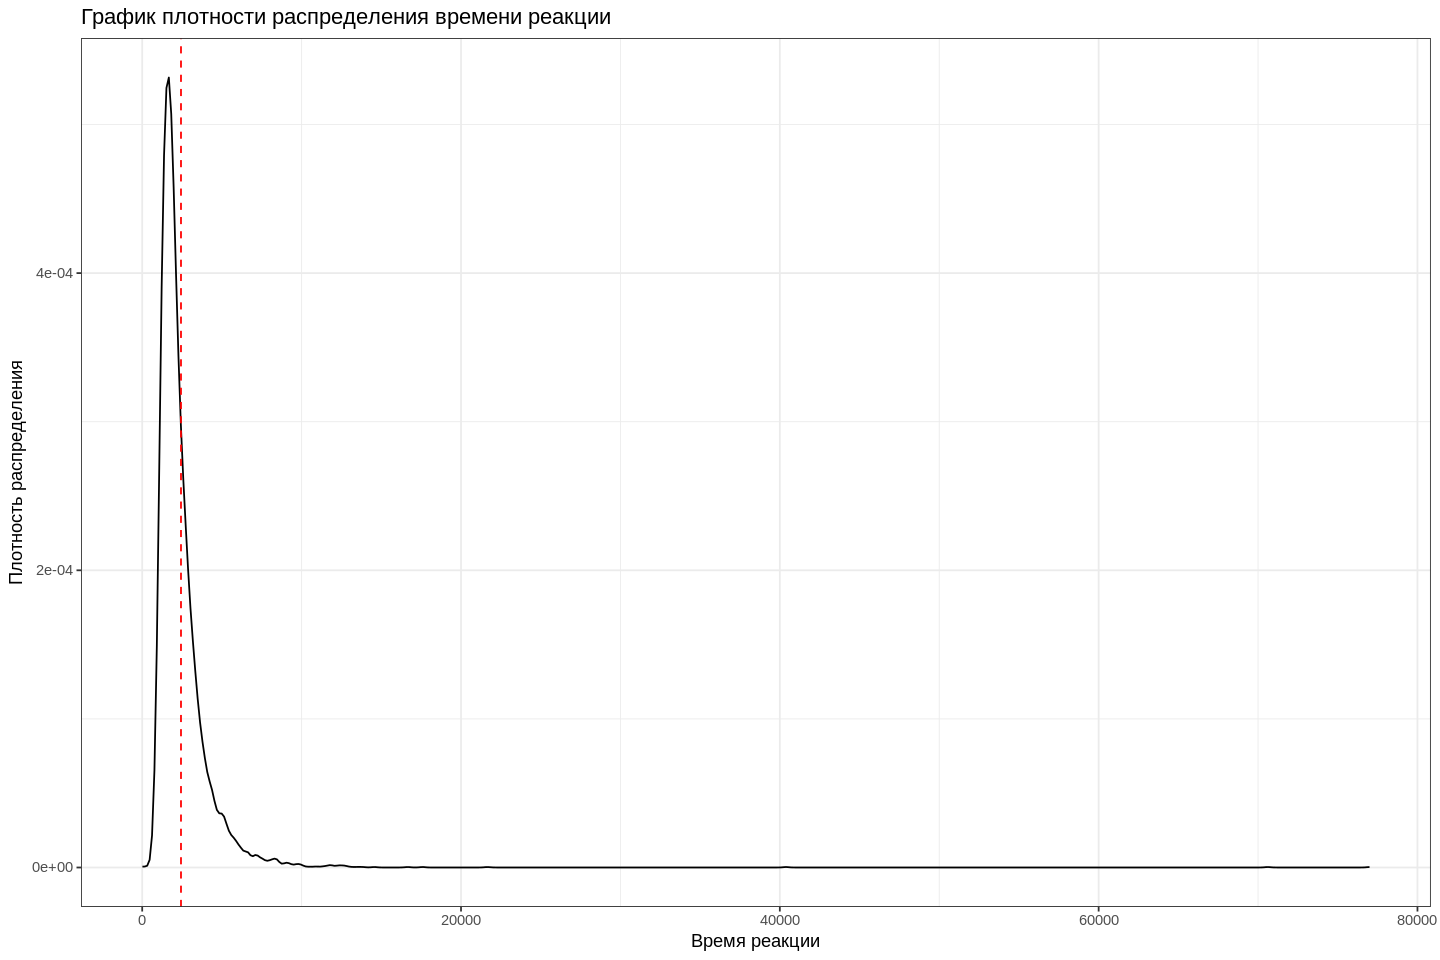

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)

mean_ <- mono %>%
  summarize(mean = mean(RT))

mono %>%
  ggplot(aes(RT)) +
   geom_density() +
    geom_vline(data = mean_, aes(xintercept = mean), color='red', linetype='dashed') +
   theme_bw() +
    xlab("Время реакции") + ylab("Плотность распределения") +
    ggtitle("График плотности распределения времени реакции")

### 1.4

Верно ли, что данные времени реакции нормально распределены? Есть ли в распределении длинные левые или правые хвосты??

```
Время реакции распределено ненормально и имеет правый хвост
```

### 1.5

Преобразуйте данные с помощью функциии логарифма (RTlog = log10(RT)).


In [ ]:
mono$RTlog <- log10(mono$RT)
dplyr::sample_n(mono, 10)

ParticipantID,TypeOfQuestion,TypeOfStimuli,WordOrder,ResponseAcceptabilityJudgement,RT,RTlog
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
a3e41dd74593a4f845aa2db64a262c4e,AcceptabilityJudgement,FillerAcceptable,Incongruent,Correct,2720,3.434569
39a7c64bb9ce89f113bbc219cb7419e1-2,AcceptabilityJudgement,FillerUnacceptable,Congruent,Wrong,2240,3.350248
ce251e843b9616ee6d11d1574a961e4c,AcceptabilityJudgement,FillerAcceptable,Congruent,Correct,2406,3.381296
e53d93839add0f8ecb8db112d5b2c956,AcceptabilityJudgement,SubjectiveComment-Material,Incongruent,Correct,2267,3.355452
ffb247049b32eea1ca01866adae318b6,AcceptabilityJudgement,FillerAcceptable,Incongruent,Correct,2239,3.350054
066f8885734d3b91f905df8c23195a27,AcceptabilityJudgement,FillerUnacceptable,NA,Wrong,2142,3.330819
4951f0210095ea9bfe65ee78531e81f3,AcceptabilityJudgement,FillerUnacceptable,Congruent,Wrong,3502,3.544316
d46d5b7e6b0bc074e73ba187fee50891,AcceptabilityJudgement,FillerUnacceptable,Congruent,Wrong,1642,3.215373
9ad98d7a34a4ba3652efd5cf754c1b41,AcceptabilityJudgement,FillerAcceptable,Congruent,Correct,2058,3.313445


### 1.6

Создайте график, похожий на 1.3, но показывающий логарифимированные значения RT.


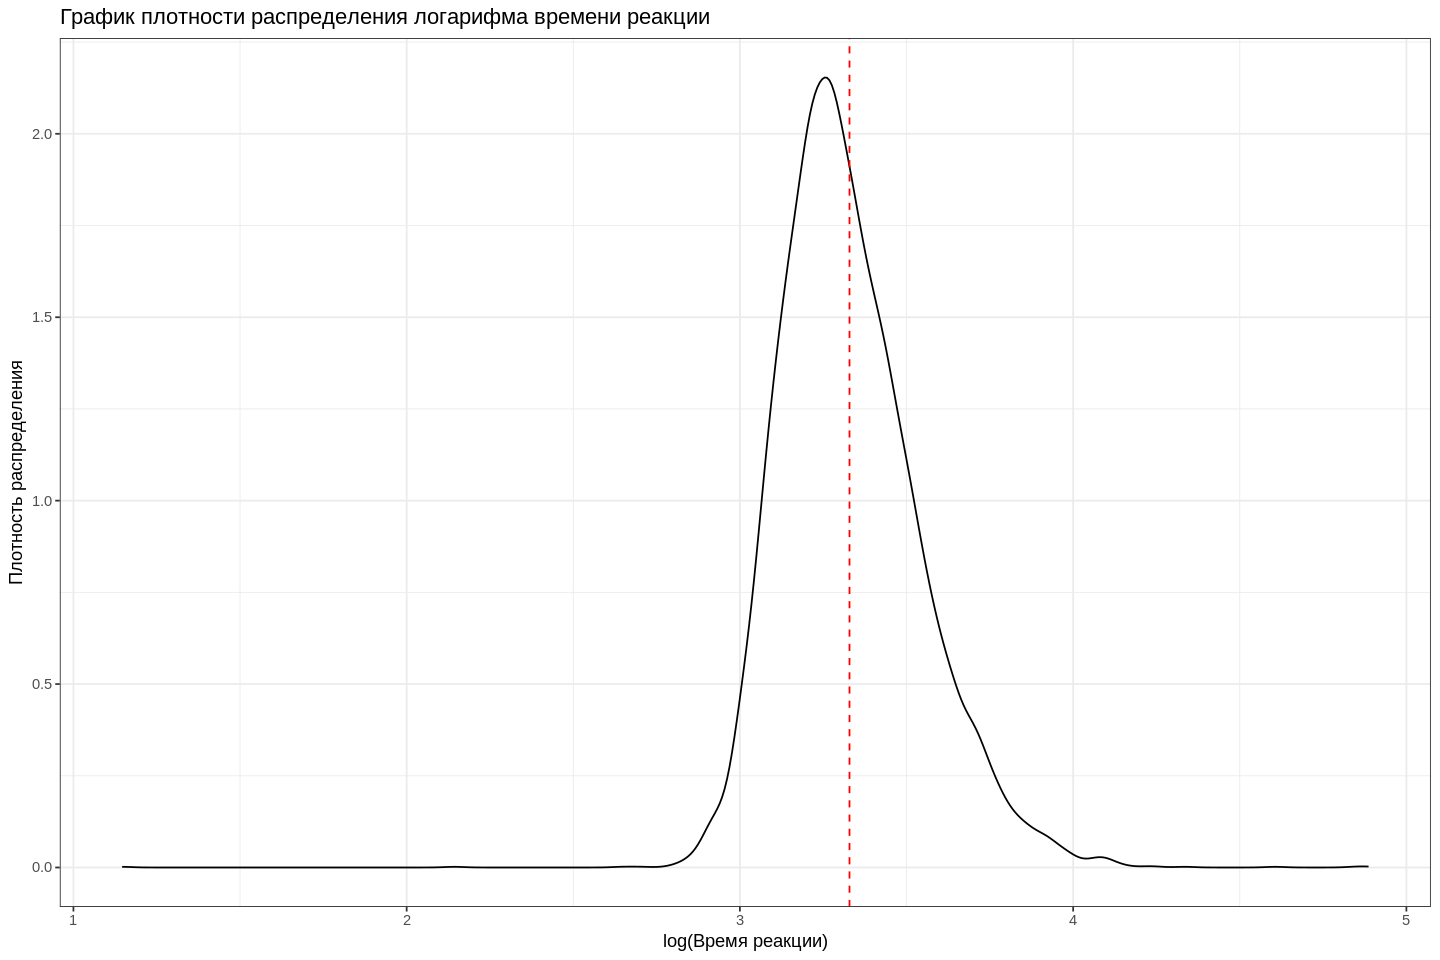

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)

mean_ <- mono %>%
  summarize(mean = mean(RTlog))

mono %>%
  ggplot(aes(RTlog)) +
   geom_density() +
    geom_vline(data = mean_, aes(xintercept = mean), color='red', linetype='dashed') +
   theme_bw() +
    xlab("log(Время реакции)") + ylab("Плотность распределения") +
    ggtitle("График плотности распределения логарифма времени реакции")

### 1.7

Отфильтруйте выбросы:
* автоматические ответы, время реакции на которые меньше 600 ms (будем полагать, что кнопка была нажата слишком быстро, еще до того, как у участника было достаточно времени рассмотреть показанный ему стимул и принять решение);
* ответы, в которых RTlog отличается от среднего значения RTlog более, чем на 3 стандартных отклонения (SD);
* филлеры (как приемлемые, так и неприемлемые).
Сохраните очищенные от выбросов данные в переменную mono1.


In [ ]:
#  Среднее значение RTlog
mean_ <- mono %>%
  summarize(mean = mean(RTlog))

# Стандартное отклонение RTlog
std_ <- mono %>%
  summarize(std = sd(RTlog))

# Очищенные от выбросов данные
mono1 <- mono %>%
  filter(RT>=600 & between(RTlog, (mean_ - 3*std_) %>% pull(mean), (mean_ + 3*std_) %>% pull(mean)) & TypeOfStimuli != 'FillerUnacceptable' & TypeOfStimuli != 'FillerAcceptable' )

glimpse(mono1)

Rows: 2,488
Columns: 7
$ ParticipantID                  <fct> 00e0b159cf5b9abcc73b92506d8b1c38, 00e0b…
$ TypeOfQuestion                 <fct> AcceptabilityJudgement, AcceptabilityJu…
$ TypeOfStimuli                  <fct> Size-Nationality, Size-Nationality, Siz…
$ WordOrder                      <fct> Congruent, Incongruent, Congruent, Inco…
$ ResponseAcceptabilityJudgement <fct> Correct, Correct, Correct, Correct, Cor…
$ RT                             <dbl> 1591, 5504, 1333, 1543, 1815, 3059, 170…
$ RTlog                          <dbl> 3.201670, 3.740678, 3.124830, 3.188366,…


### 1.8 Тест на разницу средних

Проанализируйте разницу в среднем значении RTlog у двух групп (порядок слов в стимуле: конгруэнтный vs неконгруэнтный). Сформулируйте нулевую и альтернативную гипотезу, аргументируйте, какой тип t-test’а или его аналогов следует применить, сделайте статистический и содержательный вывод о значимости различия.

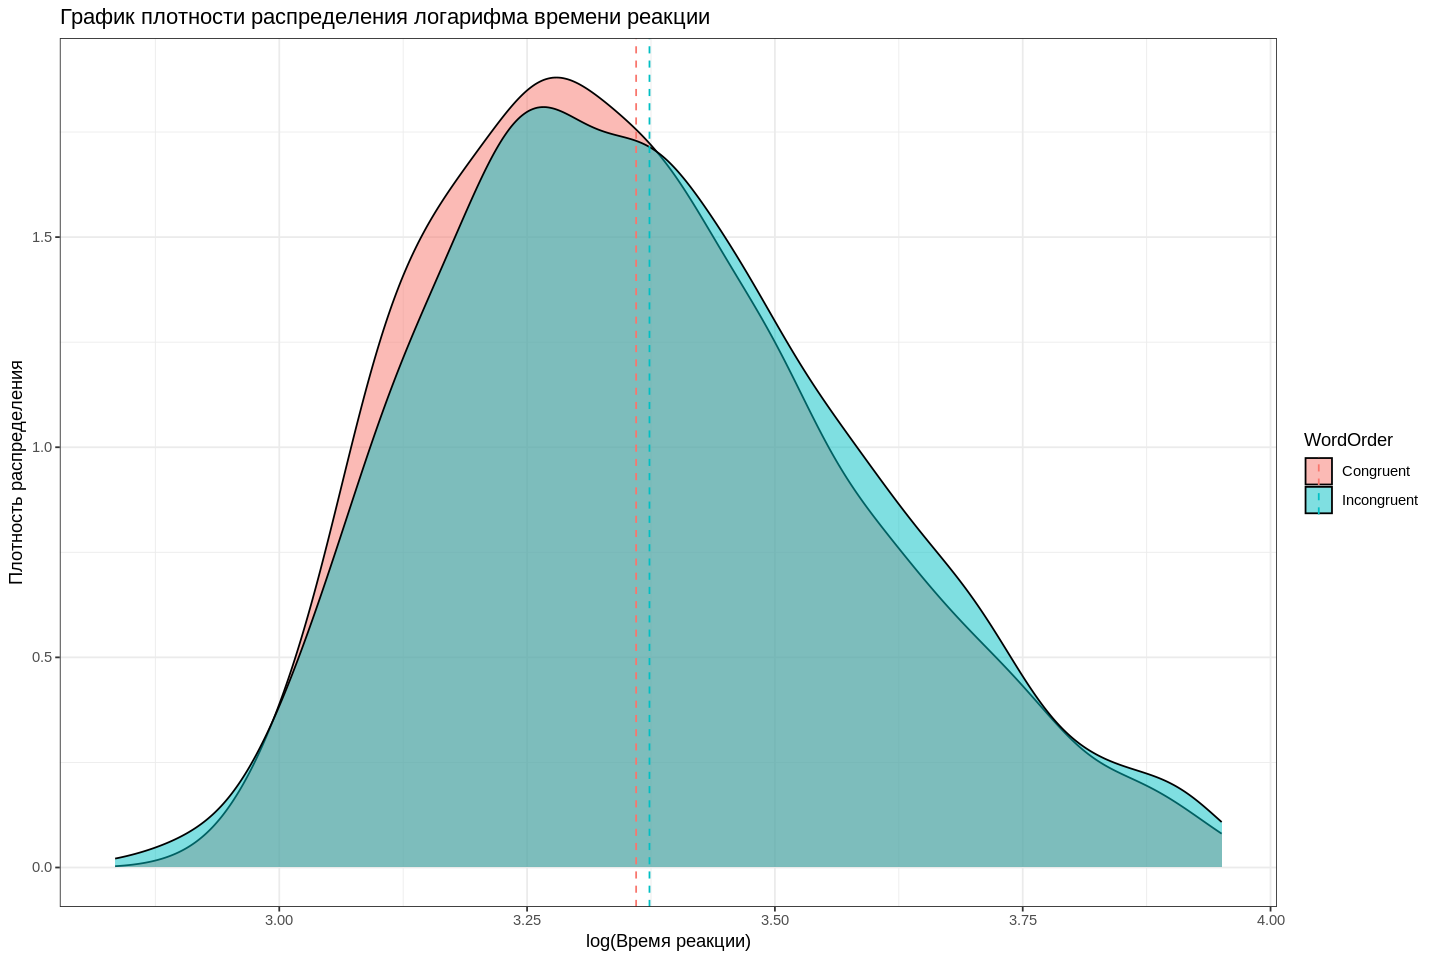

In [ ]:
options(repr.plot.width=12, repr.plot.height=8)

# Вычисляем среднее значение RT для выборки без выбросов с конгруэнтным порядком слов
mean_congr <- mono1 %>%
  filter(WordOrder == 'Congruent') %>%
  summarize(mean = mean(RTlog))

# Вычисляем среднее значение RT для выборки без выбросов с неконгруэнтным порядком слов
mean_incongr <- mono1 %>%
  filter(WordOrder == 'Incongruent') %>%
  summarize(mean = mean(RTlog))

means_ <- mono1 %>%
  drop_na(WordOrder) %>%
  group_by(WordOrder) %>%
  summarize(mean = mean(RTlog))

mono1 %>%
  drop_na(WordOrder) %>%
  ggplot(aes(RTlog, fill=WordOrder)) +
   geom_density(alpha=0.5) +
    geom_vline(data = means_,aes(xintercept = mean, color=WordOrder), linetype='dashed') +
   theme_bw() +
    xlab("log(Время реакции)") + ylab("Плотность распределения") +
    ggtitle("График плотности распределения логарифма времени реакции")

In [ ]:
# тест на нормальность
mono1 %>%
  group_by(WordOrder) %>%
  shapiro_test(RTlog)

WordOrder,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
Congruent,RTlog,0.9768832,2.975087e-13
Incongruent,RTlog,0.9850204,5.393994e-10


```
p-value < 0.05 -> мы можем сделать вывод, что оба распределения значительно отличаются от нормального
```

```
H0: Среднее время реакции при конгруэнтном порядке слов равно времени реакции
при неконгруэнтном.
H1: Среднее время реакции при конгруэнтном порядке слов НЕ равно времени
реакции при неконгруэнтном.

Для проверки гипотезы стоит использовать непараметрический t-test Манна-Уитни,
поскольку для нашей выборки не удовлетворяется требование независимости: в
эксперименте с испытуемых собиралось по несколько наблюдений. Также распределение
не нормально.
```

In [ ]:
mono_congr <- mono1 %>% filter(WordOrder == 'Congruent')
mono_incongr <- mono1 %>% filter(WordOrder == 'Incongruent')

wilcox.test(mono_congr$RTlog, mono_incongr$RTlog)


	Wilcoxon rank sum test with continuity correction

data:  mono_congr$RTlog and mono_incongr$RTlog
W = 743142, p-value = 0.0875
alternative hypothesis: true location shift is not equal to 0


```
Согласно результатам теста Манна-Уитни, мы не можем отвергнуть H0 (среднее время
реакции при конгруэнтном и неконгруэнтном порядке слов равны), поскольку между
двумя статистиками нет статистически значимой разницы, p-value > 0.05.
```

###1.9

ANOVA. Проанализируйте разницу в среднем значении RTlog, сгруппировав данные по трем условиям (прилагательное размера > прилагательное национальности, прилагательное цвета > прилагательное формы, прилагательное субъективного комментария > прилагательное материала) и по участнику. Сформулируйте нулевую и альтернативную гипотезу, аргументируйте, какой тип дисперсионного анализа следует применить, сделайте статистический и содержательный вывод о значимости различия. Это задание выполняется только для ответов при порядке слов Incongruent.

In [ ]:
mono1_inc <- mono1 %>% filter(WordOrder == 'Incongruent')
dplyr::sample_n(mono1_inc,10)

ParticipantID,TypeOfQuestion,TypeOfStimuli,WordOrder,ResponseAcceptabilityJudgement,RT,RTlog
<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>
eced84d70c1016fe3f5ede70be0a89c6,AcceptabilityJudgement,SubjectiveComment-Material,Incongruent,Correct,2476,3.393751
066f8885734d3b91f905df8c23195a27,AcceptabilityJudgement,Size-Nationality,Incongruent,Correct,2943,3.468790
9ad98d7a34a4ba3652efd5cf754c1b41,AcceptabilityJudgement,Shape-Color,Incongruent,Correct,2539,3.404663
8410b44996904d016f3bb66cedeb30fc,AcceptabilityJudgement,Shape-Color,Incongruent,Correct,3707,3.569023
8c8d0e30c553e841021f3cba2651483b,AcceptabilityJudgement,Shape-Color,Incongruent,Correct,2179,3.338257
9db83f76362a21c9afde940c066cef44,AcceptabilityJudgement,SubjectiveComment-Material,Incongruent,Correct,7926,3.899054
c932c8533913fa29eb08b0cca03e8d2d,AcceptabilityJudgement,Shape-Color,Incongruent,Correct,4388,3.642267
5ea1e5d9aa9b949b314eb9e8df5116bd,AcceptabilityJudgement,Size-Nationality,Incongruent,Correct,1793,3.253580
76b9c1df8428c17e2e42a54510a30ca1,AcceptabilityJudgement,Shape-Color,Incongruent,Correct,1121,3.049606


In [ ]:
# тест на нормальность
mono1_inc %>%
  group_by(TypeOfStimuli) %>%
  shapiro_test(RTlog)

TypeOfStimuli,variable,statistic,p
<fct>,<chr>,<dbl>,<dbl>
Shape-Color,RTlog,0.9822409,6.621601e-05
Size-Nationality,RTlog,0.9853447,3.465676e-04
SubjectiveComment-Material,RTlog,0.9830115,8.093179e-05


```
H0: Среднее время реакции одинаково для всех трех типов стимулов (TypeOfStimuli)
H1: Среднее время реакции НЕ одинаково для всех трех типов стимулов (TypeOfStimuli)

Для проверки гипотезы мы доолжны воспользоваться непараметрической
однофакторной ANOVA с повторными измерениями, т.е. тест Фридмана.

Непараметрической, поскольку параметрическая ANOVA предполагает, что
распределение нормально, однако в нашем случае распределения таковыми не
являются. Также не выполняется требование независимости.
Однофакторной, так как мы должны сравнить средние значения RTlog между тремя
группами параметра TypeOfStimuli.
С повторными измерениями, поскольку каждый участник отвечал на несколько вопросов.
```

In [ ]:
install.packages("rstatix")
library(rstatix) # for ANOVA

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
mono1_inc %>%
  group_by(TypeOfStimuli) %>%
  summarise(dist = n_distinct(ParticipantID),
  cnt = n()
  )

TypeOfStimuli,dist,cnt
<fct>,<int>,<int>
Shape-Color,140,408
Size-Nationality,140,413
SubjectiveComment-Material,140,418


In [ ]:
# непараметрический аналог однофакторной anova с повторными измерениями
# aov <- mono1_inc %>%
#   group_by(TypeOfStimuli, ParticipantID) %>%
#   summarise(avg_RTlog = mean(RTlog)) %>% ungroup() %>%
#   anova_test(
#   dv = avg_RTlog, wid = ParticipantID,
#   within = c(TypeOfStimuli)
#   )
mono_inc_grouped <- mono1_inc %>%
  group_by(TypeOfStimuli, ParticipantID) %>%
  summarise(avg_RTlog = mean(RTlog))

# aov <- mono_inc_grouped %>%
#   friedman_test(
#   avg_RTlog, ParticipantID |TypeOfStimuli
#   )

mono_inc_grouped %>% friedman_test(
  avg_RTlog ~ ParticipantID | TypeOfStimuli
  )

# get_anova_table(aov)

### 1.10 Post-hoc тест

Примените TukeyHSD тест, чтобы выяснить, какие конкретно пары условий TypeOfStimuli отличаются друг от друга по среднему значению RTlog.
Это задание, аналогично, выполняется только для ответов при порядке слов Incongruent.

In [ ]:
aov_model <- aov(RTlog ~ TypeOfStimuli, mono1_inc)
aov_model

Call:
   aov(formula = RTlog ~ TypeOfStimuli, data = mono1_inc)

Terms:
                TypeOfStimuli Residuals
Sum of Squares        0.63093  54.98427
Deg. of Freedom             2      1236

Residual standard error: 0.2109162
Estimated effects may be unbalanced

In [ ]:
TukeyHSD(aov_model)

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = RTlog ~ TypeOfStimuli, data = mono1_inc)

$TypeOfStimuli
                                                   diff         lwr
Size-Nationality-Shape-Color                -0.00831177 -0.04285819
SubjectiveComment-Material-Shape-Color      -0.05136914 -0.08581273
SubjectiveComment-Material-Size-Nationality -0.04305737 -0.07739528
                                                     upr     p adj
Size-Nationality-Shape-Color                 0.026234652 0.8389647
SubjectiveComment-Material-Shape-Color      -0.016925549 0.0014002
SubjectiveComment-Material-Size-Nationality -0.008719451 0.0092948


Запишите ниже интерпретацию post-hoc теста.

```
```